In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [3]:
noreuse = pd.read_csv('noreuse.stage3.csv',
  names=["File", "Condition", "Metric", "Value"])
reuse = pd.read_csv('reuse.stage3.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147394560
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538111
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156875
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715
9346,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743
9348,Lake/Main.lean,reuse_across_ctor_disabled,c_file_size,2894


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_enabled,rss,151326720
1,Init/Prelude.lean,reuse_across_ctor_enabled,num_alloc,1321786
2,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_alloc,26198907
3,Init/Prelude.lean,reuse_across_ctor_enabled,num_dealloc,1273534
4,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_dealloc,25817638
...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_enabled,num_pages,3715
9346,Lake/Main.lean,reuse_across_ctor_enabled,num_exports,0
9347,Lake/Main.lean,reuse_across_ctor_enabled,num_recycled_pages,742
9348,Lake/Main.lean,reuse_across_ctor_enabled,c_file_size,2894


In [9]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
display(HTML(f"<h3>time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}</h3>"))

In [5]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_enabled,rss,151326720,reuse_across_ctor_disabled,147394560
1,Init/Prelude.lean,reuse_across_ctor_enabled,num_alloc,1321786,reuse_across_ctor_disabled,1321689
2,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_alloc,26198907,reuse_across_ctor_disabled,26538111
3,Init/Prelude.lean,reuse_across_ctor_enabled,num_dealloc,1273534,reuse_across_ctor_disabled,1273439
4,Init/Prelude.lean,reuse_across_ctor_enabled,num_small_dealloc,25817638,reuse_across_ctor_disabled,26156875
...,...,...,...,...,...,...
9345,Lake/Main.lean,reuse_across_ctor_enabled,num_pages,3715,reuse_across_ctor_disabled,3715
9346,Lake/Main.lean,reuse_across_ctor_enabled,num_exports,0,reuse_across_ctor_disabled,0
9347,Lake/Main.lean,reuse_across_ctor_enabled,num_recycled_pages,742,reuse_across_ctor_disabled,743
9348,Lake/Main.lean,reuse_across_ctor_enabled,c_file_size,2894,reuse_across_ctor_disabled,2894


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Parser/Level.lean,402,584,182,31.164384
1,Init/Data/Nat.lean,170,243,73,30.041152
2,Lean/Meta/Tactic/AC.lean,322,437,115,26.315789
3,Lean/Meta/KAbstract.lean,1000,1307,307,23.488906
4,Lean/Meta/Tactic/AC/Main.lean,1838,2335,497,21.284797
...,...,...,...,...,...
845,Init/Data/Nat/Dvd.lean,762,554,-208,-37.545126
846,Lean/Meta/Tactic/LinearArith/Nat.lean,320,231,-89,-38.528139
847,Lean/Compiler/LCNF/Passes.lean,1339,962,-377,-39.189189
848,Init/Data/Int/Gcd.lean,312,211,-101,-47.867299


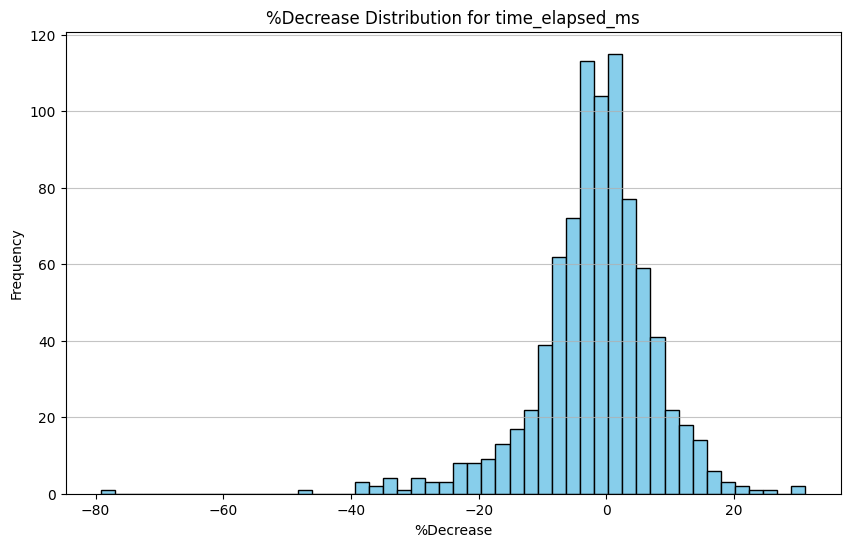

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Server/Rpc.lean,263630848,262852608,-778240,-0.296075
1,Lean/Elab/PreDefinition.lean,339927040,338366464,-1560576,-0.461209
2,Lean/Elab.lean,430297088,428081152,-2215936,-0.517644
3,Lean/Meta/Tactic.lean,343871488,342065152,-1806336,-0.528068
4,Lean/Elab/Tactic.lean,376070144,373972992,-2097152,-0.560776
...,...,...,...,...,...
845,Init/Data/Sum.lean,88690688,84889600,-3801088,-4.477684
846,Init/Data/Array/Subarray.lean,115204096,110219264,-4984832,-4.522650
847,Init/SizeOf.lean,90021888,86085632,-3936256,-4.572489
848,Init/Data/Int/Basic.lean,102772736,98185216,-4587520,-4.672312


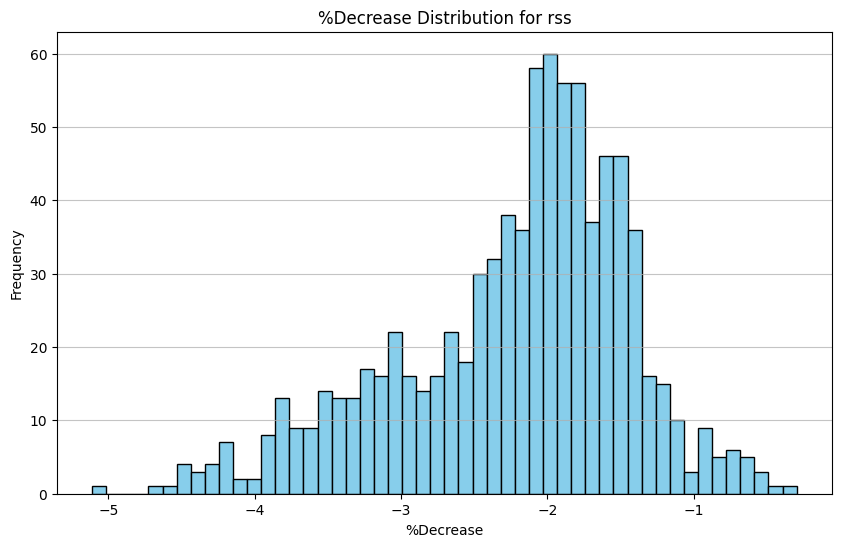

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Control/ExceptCps.lean,2732271,2778539,46268,1.665192
1,Init/Control/StateCps.lean,2818149,2864594,46445,1.621347
2,Init/Data/Option/Basic.lean,4499866,4570322,70456,1.541598
3,Init/PropLemmas.lean,8482281,8611366,129085,1.499007
4,Init/SimpLemmas.lean,5473472,5556700,83228,1.497795
...,...,...,...,...,...
845,Lean/Server/Rpc/Deriving.lean,18823823,18330782,-493041,-2.689689
846,Lean/Data/Lsp/Internal.lean,8232555,7965523,-267032,-3.352347
847,Lean/Meta/Tactic/Rewrite.lean,6900195,6673295,-226900,-3.400119
848,Lean/Meta/Coe.lean,12018130,11295173,-722957,-6.400584


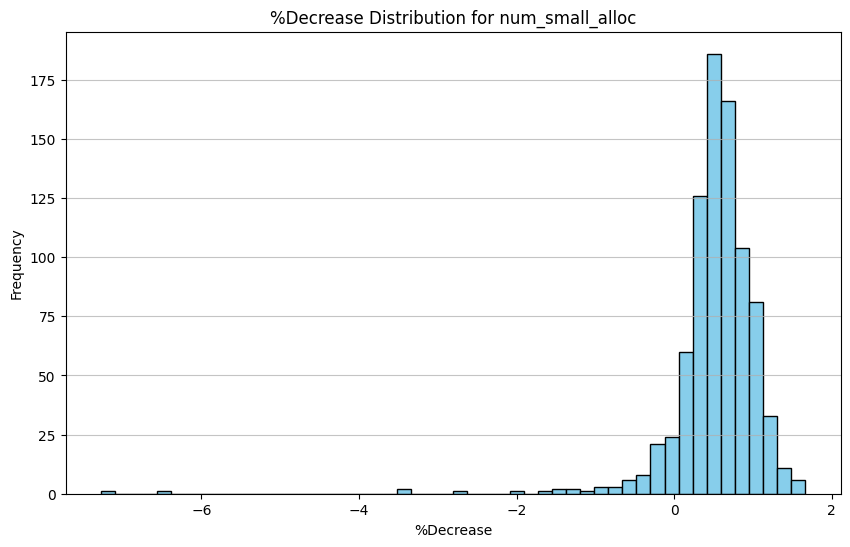

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/CtorRecognizer.lean,138881,139844,963,0.688624
1,Lean/Compiler/IR/ResetReuse.lean,262394,263883,1489,0.564265
2,Lean/Data/LOption.lean,41913,42005,92,0.219022
3,Lean/Util/FileSetupInfo.lean,48192,48296,104,0.215339
4,Lean/Meta/LevelDefEq.lean,340504,341207,703,0.206033
...,...,...,...,...,...
845,Lean/Data/Lsp/Internal.lean,397898,366489,-31409,-8.570244
846,Lean/Meta/Coe.lean,537971,491859,-46112,-9.375044
847,Lean/Meta/Tactic/Rewrite.lean,284497,258123,-26374,-10.217609
848,Lean/Server/Rpc/Deriving.lean,848615,755644,-92971,-12.303545


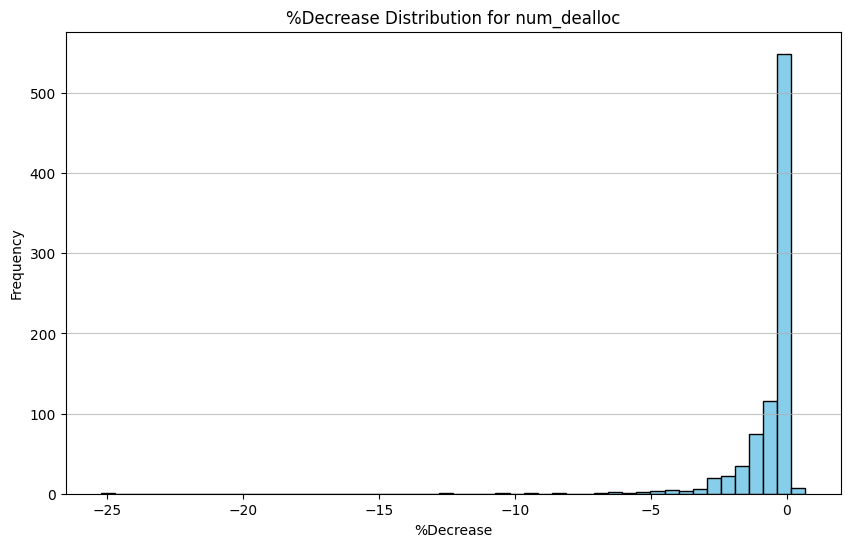

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Control/ExceptCps.lean,2449160,2495421,46261,1.853835
1,Init/Control/StateCps.lean,2533958,2580396,46438,1.799646
2,Init/Coe.lean,1372438,1395766,23328,1.671340
3,Init/Data/Option/Basic.lean,4248976,4319432,70456,1.631140
4,Init/Data/Option/Instances.lean,2102504,2136367,33863,1.585074
...,...,...,...,...,...
845,Lean/Server/Rpc/Deriving.lean,18161455,17689424,-472031,-2.668436
846,Lean/Data/Lsp/Internal.lean,7811661,7552878,-258783,-3.426283
847,Lean/Meta/Tactic/Rewrite.lean,6401250,6182478,-218772,-3.538581
848,Lean/Meta/Coe.lean,11513826,10805955,-707871,-6.550749


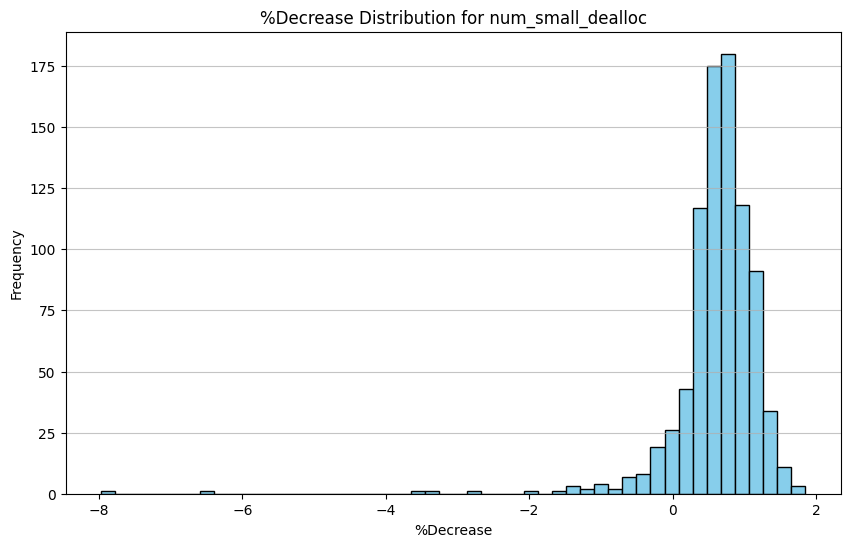

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Meta/CtorRecognizer.lean,48361,55343,6982,12.615868
1,Lean/Data/LOption.lean,8213,8687,474,5.456429
2,Lean/Elab/RecAppSyntax.lean,5274,5545,271,4.887286
3,Lean/Meta/LevelDefEq.lean,103416,107478,4062,3.779378
4,Init/Data/Sum.lean,7127,7387,260,3.519697
...,...,...,...,...,...
845,Lean/Elab/Tactic/Omega/OmegaM.lean,528681,283398,-245283,-86.550717
846,Lean/Elab/MacroArgUtil.lean,489019,256986,-232033,-90.290133
847,Lean/Meta/Tactic/Rewrite.lean,336709,170153,-166556,-97.886020
848,Lean/Meta/Coe.lean,574072,251724,-322348,-128.056125


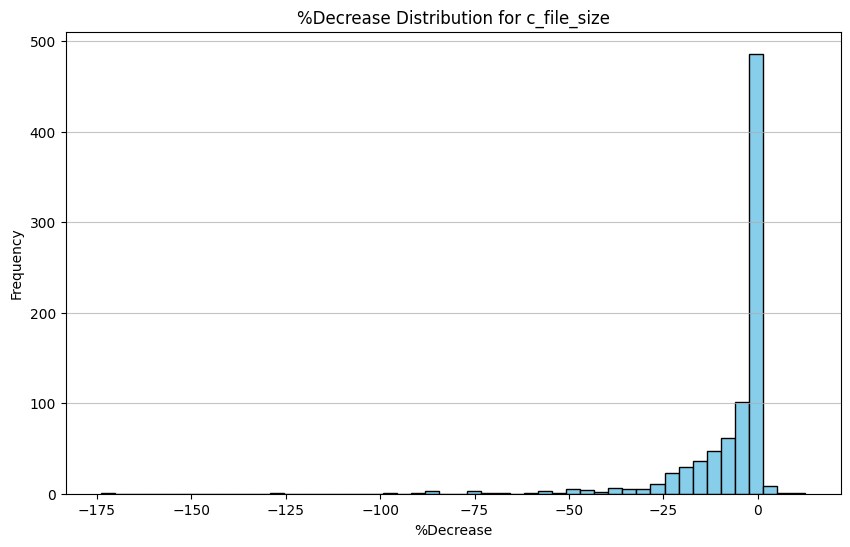

<Axes: >

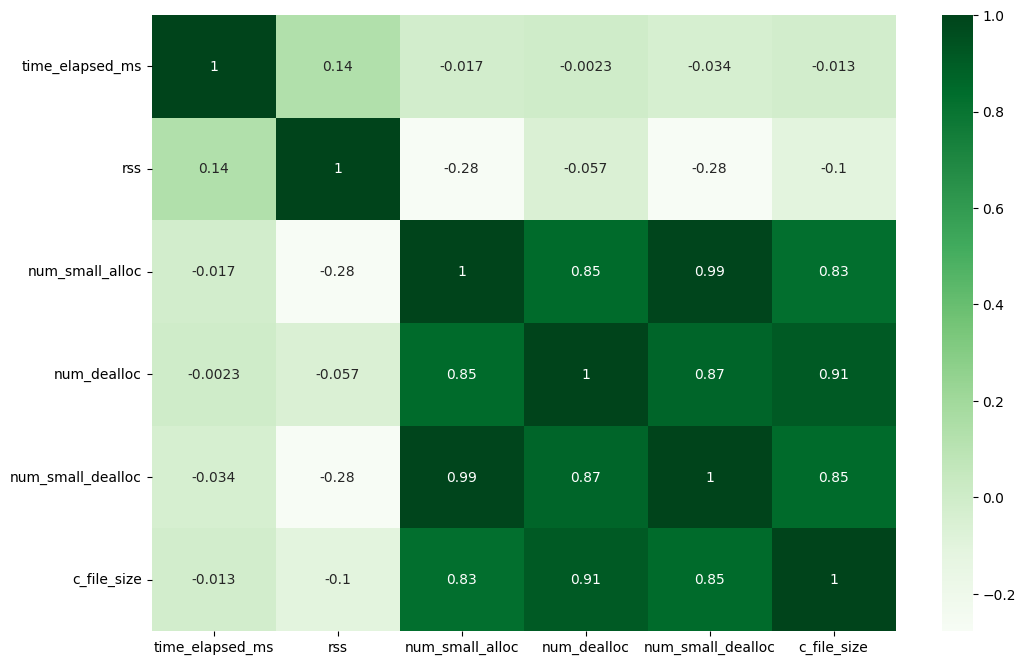

In [6]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc", "c_file_size"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,40253,4034116
Lean/Elab/Do.lean,32947,6328540
Lean/Elab/Quotation.lean,27980,3926757
Lean/Meta/Match/MatchEqs.lean,26102,2950442
Lean/Elab/App.lean,25978,4005911
...,...,...
Lean/Runtime.lean,139,45677
Lean/Meta/TransparencyMode.lean,135,63389
Init/Data/Int/Bitwise.lean,128,61700


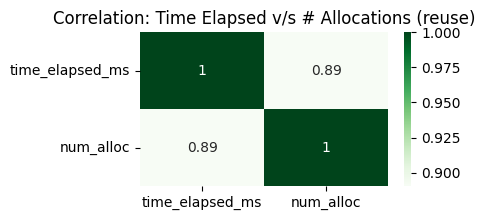

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,52535,4060739
Lean/Elab/Quotation.lean,34550,4037147
Lean/Elab/Match.lean,34524,3847469
Lean/Meta/Match/MatchEqs.lean,34063,3015219
Lean/Elab/Do.lean,32177,6328533
...,...,...
Init/Data/ByteArray.lean,143,55552
Lean/Runtime.lean,141,45677
Init/Data/FloatArray.lean,140,55502


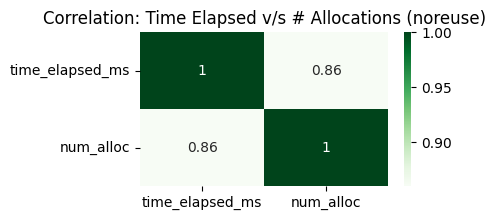

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,52535,4060739
Lean/Elab/Tactic/Omega/Frontend.lean,40253,4034116
Lean/Elab/Quotation.lean,34550,4037147
Lean/Elab/Match.lean,34524,3847469
Lean/Meta/Match/MatchEqs.lean,34063,3015219
...,...,...
Init/Data/Cast.lean,130,48545
Init/Data/Int/Bitwise.lean,128,61700
Init/Data/Char.lean,117,53141


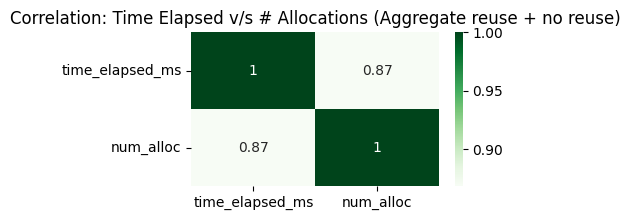

In [7]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()


In [ ]:
def print_file_info(name):
    for reuses in ["reuse", "no_reuse"]: